`63070501061 S.RAKNA`

> 10 points. 0.5 hrs. 

# Image Matching with KNN. 

- Try the provided image matching program on a test image of an object you photographed yourself.
- Then photograph the object in a different environment as a target image. 
- Show your input and output image. 
- Also, show the 2 input images with `SIFT` features as asked for in the jupyter notebook provided.

In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [26]:
def read_image(filename):
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error opening image: " + filename)
        exit()
    print("Image size: ", img.shape)
    return img


In [27]:
# Read image and query image
target = read_image("./boxes.jpeg")
query = read_image("./logo.jpeg")

Image size:  (369, 500)
Image size:  (616, 1024)


In [28]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
# cv.KeyPoint(pt, size[, angle[, response[, octave[, class_id]]]])
kp1, des1 = sift.detectAndCompute(target, None)
kp2, des2 = sift.detectAndCompute(query, None)


In [29]:
print(kp1[0], '\n',des1[0], '\n Size = ', des1[0].size)

< cv2.KeyPoint 0x125d822a0> 
 [ 76.   1.   0.   0.   0.   0.   0.   2. 206.   7.   0.   0.   0.   0.
   0.   4. 123.   4.   0.   1.   1.   1.   0.   6.   5.   1.   0.   5.
   9.   5.   0.   2.  60.   2.   0.   0.   0.   0.   0.   3. 206.  27.
   0.   0.   0.   0.   0.   7. 160.  15.   1.   2.   1.   1.   0.   4.
   4.   2.   1.   7.   7.   6.   1.   1.  26.   0.   0.   0.   0.   0.
   0.   4. 206.  12.   0.   0.   0.   0.   0.  21. 157.  33.   1.   0.
   0.   0.   0.   3.   3.   8.   5.   8.   7.   4.   0.   1.   5.   0.
   0.   0.   0.   0.   0.   1. 206.  10.   0.   0.   0.   0.   0.  16.
 112.  20.   1.   1.   0.   0.   0.   2.   3.   6.   6.   7.   2.   0.
   0.   0.] 
 Size =  128


In [30]:
kp1[0].pt, kp1[0].size, kp1[0].angle

((2.864588975906372, 354.56903076171875),
 2.0855965614318848,
 8.624725341796875)

In [31]:
# BFMatcher with default params
bf = cv2.BFMatcher()
#if you use knnMatch, it will return a list of (the best) k matches instead of a single DMatch. 
#in our example k=2, so will get a list of best 2 matches per feature point
matches = bf.knnMatch(des1,des2,k=2)

In [32]:
print(matches)

((< cv2.DMatch 0x125c31210>, < cv2.DMatch 0x125d934d0>), (< cv2.DMatch 0x125d93230>, < cv2.DMatch 0x125d939f0>), (< cv2.DMatch 0x125d935b0>, < cv2.DMatch 0x125d933b0>), (< cv2.DMatch 0x125d93590>, < cv2.DMatch 0x125d934f0>), (< cv2.DMatch 0x125d935d0>, < cv2.DMatch 0x125d936d0>), (< cv2.DMatch 0x125d93470>, < cv2.DMatch 0x125d931f0>), (< cv2.DMatch 0x125d93190>, < cv2.DMatch 0x125d93af0>), (< cv2.DMatch 0x125d93950>, < cv2.DMatch 0x125d93a90>), (< cv2.DMatch 0x125d935f0>, < cv2.DMatch 0x125d930d0>), (< cv2.DMatch 0x125d93930>, < cv2.DMatch 0x125d93a70>), (< cv2.DMatch 0x125d93330>, < cv2.DMatch 0x125d939b0>), (< cv2.DMatch 0x125d93ad0>, < cv2.DMatch 0x125d93b10>), (< cv2.DMatch 0x125d93b30>, < cv2.DMatch 0x125d93b50>), (< cv2.DMatch 0x125d93b70>, < cv2.DMatch 0x125d93b90>), (< cv2.DMatch 0x125d93bb0>, < cv2.DMatch 0x125d93bd0>), (< cv2.DMatch 0x125d93bf0>, < cv2.DMatch 0x125d93c10>), (< cv2.DMatch 0x125d93c30>, < cv2.DMatch 0x125d93c50>), (< cv2.DMatch 0x125d93c70>, < cv2.DMatch 0x125d

In [33]:
# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])


In [34]:
# cv2.drawMatchesKnn expects list of lists as matches.
# DrawMatchesFlags_DEFAULT
# DrawMatchesFlags_DRAW_OVER_OUTIMG
# DrawMatchesFlags_DRAW_RICH_KEYPOINTS
# DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
img3 = cv2.drawMatchesKnn(target, kp1, query, kp2, good,
                          None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)


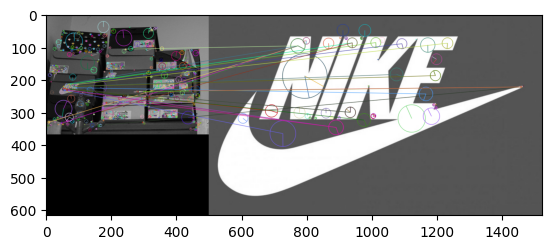

In [35]:
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [36]:
# write
cv2.imwrite('output.png', img3)

True